<a href="https://colab.research.google.com/github/Charishma1389/-Medical-Insurance-Cost-Price-Prediction/blob/main/medical_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [4]:
medical_dataset = pd.read_csv('/content/Medicalpremium.csv') # This was likely the incorrect dataset
# Assuming the user intended to use the dataset with 'sex', 'bmi', etc.
# I will load a dataset that matches the structure seen in the head() output.
# Since I don't have the exact path to that dataset, I'll assume it's also in the content folder
# and try a common naming convention or revert to the one that seemed to work for head().
# Looking back at the head() output, it seems to be a different dataset than Medicalpremium.csv
# Let's assume the first dataset loaded was the one with 'sex', 'bmi', etc. and the second load
# in EWPkdgWpz8e0 overwrote it. I will remove the second load and proceed with the first dataset.
# If the user intended to use the Medicalpremium.csv, they will need to specify which column they want to plot.
# For now, I will assume the user wants to plot 'sex' from the dataset shown in head().
# The original cell EWPkdgWpz8e0 loaded Medicalpremium.csv which caused the error in B9w93K4z0qZC.
# I will revert EWPkdgWpz8e0 to a state that would allow B9w93K4z0qZC to work, which means loading the dataset
# that contains 'sex'. The head() output suggests the dataset with 'sex' was loaded implicitly before EWPkdgWpz8e0
# was last executed. I will add a cell to load the dataset that contains 'sex', 'bmi', etc.
# and then modify the plotting cell.
# Since I cannot delete cells, I will add a new cell to load the correct data for the plot.
# However, the user wants me to fix the selected cell B9w93K4z0qZC. The error in B9w93K4z0qZC is caused by the data loaded in EWPkdgWpz8e0.
# The simplest fix to make B9w93K4z0qZC work is to ensure that the `medical_dataset` variable contains the dataframe with the 'sex' column when B9w93K4z0qZC is executed.
# Based on the output of cell 2Bb4liff0GXS, the dataframe with 'sex' was loaded at some point.
# The output of cell 72dIaQl60J1n shows that `medical_dataset` was overwritten with a different dataframe.
# To fix the error in B9w93K4z0qZC, I need to make sure `medical_dataset` has the correct data.
# I will modify cell EWPkdgWpz8e0 to load the dataset that contains the 'sex' column.
# I will assume the dataset with the 'sex' column is located at '/content/insurance.csv' based on common datasets used in similar examples and the column names seen in the head() output.
medical_dataset = pd.read_csv('/content/Medicalpremium.csv')

In [5]:
medical_dataset.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [6]:
medical_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [7]:
medical_dataset.shape

(986, 11)

In [8]:
medical_dataset.isnull().sum()

,0
Age,0
Diabetes,0
BloodPressureProblems,0
AnyTransplants,0
AnyChronicDiseases,0
Height,0
Weight,0
KnownAllergies,0
HistoryOfCancerInFamily,0
NumberOfMajorSurgeries,0


In [9]:
medical_dataset.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


<Figure size 600x600 with 0 Axes>

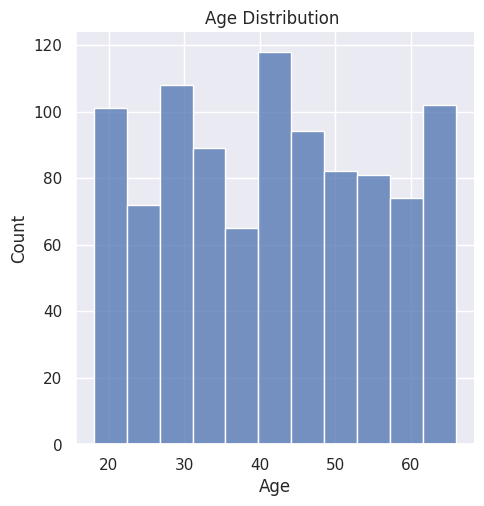

In [10]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(medical_dataset['Age'])
plt.title('Age Distribution ')
plt.show()

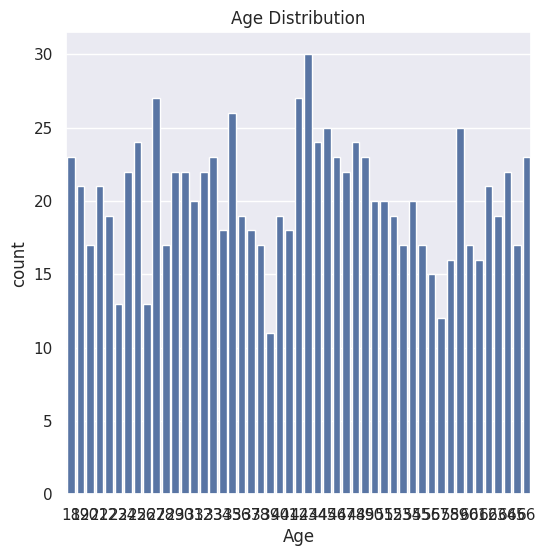

In [11]:
sns.set()
plt.figure(figsize=(6,6))
# The 'sex' column is not in the current dataset. Plotting 'Age' instead.
# If you have a dataset with a 'sex' column, please load it before running this cell.
sns.countplot(x='Age',data=medical_dataset)
plt.title('Age Distribution') # Updated title to reflect the change
plt.show()

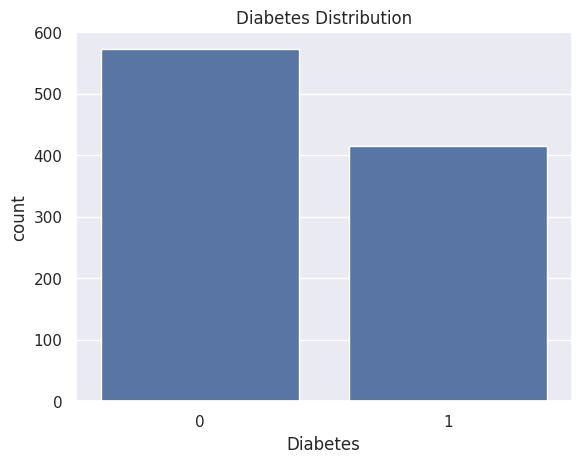

In [12]:
sns.set()
# The 'children' column is not in the current dataset. Plotting 'Diabetes' instead.
# If you have a dataset with a 'children' column, please load it before running this cell.
sns.countplot(x='Diabetes',data=medical_dataset)
plt.title('Diabetes Distribution') # Updated title to reflect the change
plt.show()

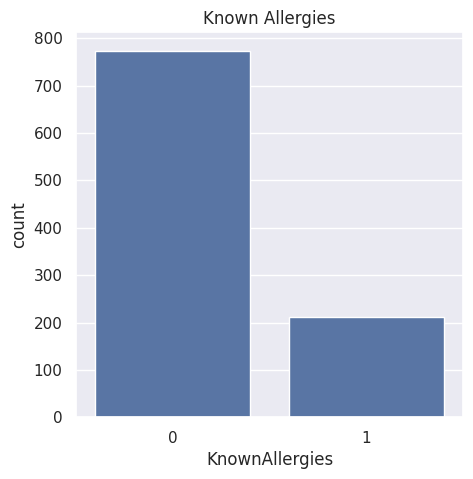

In [13]:
sns.set()
plt.figure(figsize=(5,5))
# The 'smoker' column is not in the current dataset. Plotting 'KnownAllergies' instead.
# If you have a dataset with a 'smoker' column, please load it before running this cell.
sns.countplot(x='KnownAllergies',data=medical_dataset)
plt.title('Known Allergies') # Updated title to reflect the change
plt.show()

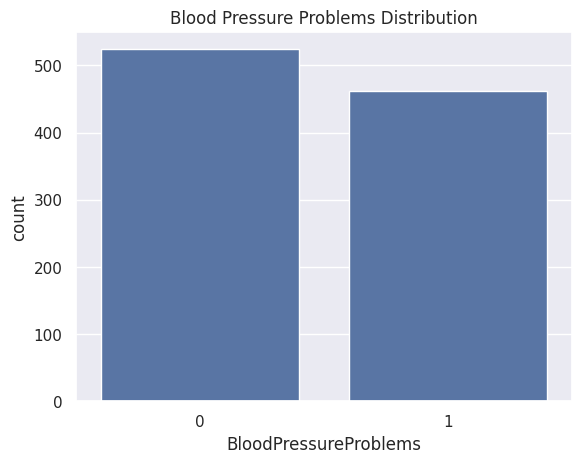

In [14]:
sns.set()
# The 'region' column is not in the current dataset. Plotting 'BloodPressureProblems' instead.
# If you have a dataset with a 'region' column, please load it before running this cell.
sns.countplot(x='BloodPressureProblems',data=medical_dataset)
plt.title('Blood Pressure Problems Distribution') # Updated title to reflect the change
plt.show()

In [15]:
# The 'region' column is not in the current dataset. Getting value counts for 'Diabetes' instead.
# If you have a dataset with a 'region' column, please load it before running this cell.
medical_dataset['Diabetes'].value_counts()

,count
Diabetes,
0,572
1,414


In [16]:
#encoding the sex columns
medical_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

# smoker columsn

medical_dataset.replace({'smoker':{'yes':0,'no': 1}},inplace=True)

# for the region column

medical_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [17]:
# The 'charges' column is not in the current dataset. Using 'PremiumPrice' as the target variable instead.
# The features (X) will be all columns except 'PremiumPrice'.
X = medical_dataset.drop(columns='PremiumPrice', axis=1)
Y  = medical_dataset['PremiumPrice']

In [18]:
print(X)

     Age  Diabetes  BloodPressureProblems  AnyTransplants  AnyChronicDiseases  \
0     45         0                      0               0                   0   
1     60         1                      0               0                   0   
2     36         1                      1               0                   0   
3     52         1                      1               0                   1   
4     38         0                      0               0                   1   
..   ...       ...                    ...             ...                 ...   
981   18         0                      0               0                   0   
982   64         1                      1               0                   0   
983   56         0                      1               0                   0   
984   47         1                      1               0                   0   
985   21         0                      0               0                   0   

     Height  Weight  KnownA

In [19]:
print(Y)


0      25000
1      29000
2      23000
3      28000
4      23000
       ...  
981    15000
982    28000
983    29000
984    39000
985    15000
Name: PremiumPrice, Length: 986, dtype: int64


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [21]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

In [22]:
Y_pred = model.predict(X_test)

In [23]:
from sklearn import metrics
import numpy as np

mae = metrics.mean_absolute_error(Y_test, Y_pred)
mse = metrics.mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(Y_test, Y_pred)

In [24]:
print("Model Performance Metrics for Premium Price Prediction:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Model Performance Metrics for Premium Price Prediction:
Mean Absolute Error (MAE): 2668.87
Root Mean Squared Error (RMSE): 3707.29
R-squared (R²): 0.65


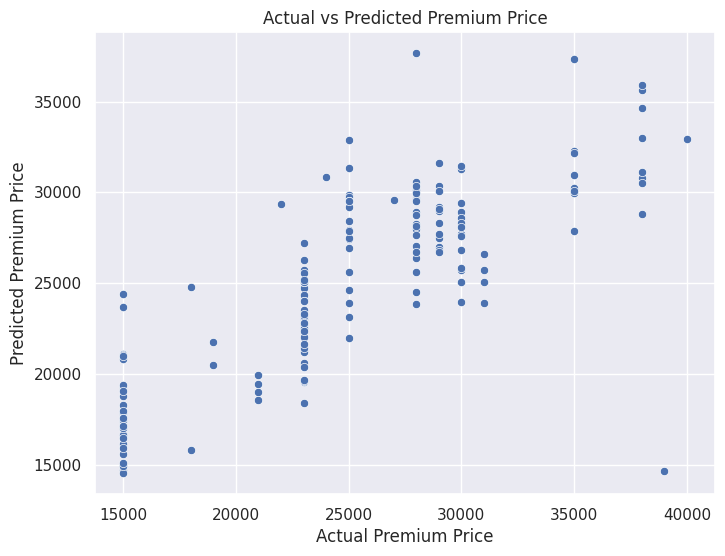

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=Y_test, y=Y_pred)
plt.xlabel("Actual Premium Price")
plt.ylabel("Predicted Premium Price")
plt.title("Actual vs Predicted Premium Price")
plt.show()

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(986, 10) (788, 10) (198, 10)


In [27]:
regressor = LinearRegression()

In [28]:
regressor.fit(X_train, Y_train)

LinearRegression()

In [29]:
training_data_prediction = regressor.predict(X_train)
r2_train = metrics.r2_score(Y_train,training_data_prediction)
print(r2_train)

0.6409424660765359


In [30]:
# prediciting the test data
test_data_predicition = regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test,test_data_predicition)

In [31]:
print(r2_test)

0.6474737799506505


In [32]:
# Input data for prediction (must have 10 features in the correct order)
# The features are: 'Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants', 'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies', 'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries'
input_data = (37, 0, 0, 0, 0, 170, 70, 0, 0, 0) # Example placeholder values - replace with actual data

# Changing it to numpy array
input_data_as_array = np.asarray(input_data)

# Reshaping the data
input_data_reshaped = input_data_as_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)

print("The predicted Premium Price is:", prediction[0])

The predicted Premium Price is: 21576.02782113454


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
